In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
import textblob
from textblob import Word
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib as plt

df = pd.read_csv('C://Users//asp//Desktop//Analytics Vidhya//train_E6oV3lV.csv')

In [3]:
stop = stopwords.words('english')

df['word_count'] = df['tweet'].apply(lambda x: len(str(x).split(" ")))
df['stopwords'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
df['hashtags'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df['numeric'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['tweet'] = df['tweet'].str.replace('[^\w\s]','')

## Remove stop words..
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

## check the count of common words..
df_commom = pd.Series(' '.join(df['tweet']).split()).value_counts()[:10]

df_commom_indx = list(df_commom.index)

df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in df_commom_indx))

## Remove the least occuring words..
df_least = pd.Series(' '.join(df['tweet']).split()).value_counts()[-10:]
df_least_indx = list(df_least.index)

df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in df_least_indx))

## stemming step..
df['tweet'] = df['tweet'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))

## lemmatization..
df['tweet'] = df['tweet'].apply(lambda x: " ".join([lemma.lemmatize(word) for word in x.split()]))

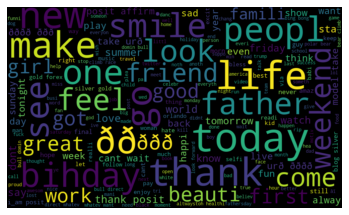

In [4]:
## plot word cloud...
from wordcloud import WordCloud
import matplotlib.pyplot as plt

allWords = ' '.join([twts for twts in df['tweet']])
wordcloud = WordCloud(width=1000, height=600, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [5]:
df2 = df[['label','tweet']]
df3 = df2[:].values
df4 = pd.DataFrame(df3)

Y = df4[0]
df_processed = df4[1]

In [6]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
all_words = []

for message in df_processed:
    words = word_tokenize(message)
    for w in words:
        all_words.append(w)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
all_words = nltk.FreqDist(all_words)
print(len(all_words))
word_features = list(all_words.keys())[:15000]

38874


In [12]:
def find_features(message):
    words = word_tokenize(message)
    features = {}
    for word in word_features:
        features[word] = (word in words)
        
    return features

messages = zip(df_processed, Y)

In [13]:
seed = 1
np.random.seed = seed

featuresets = [(find_features(text), label) for (text,label) in messages]

In [14]:
from sklearn import model_selection

training, testing = model_selection.train_test_split(featuresets, test_size = 0.2, random_state= seed)

In [16]:
names = ['k neighbors', 'Random Forest', 'Decision Tree', 'Naive Bayes', 'SVM', 'Logistic Regression', 'SGD Classifier']

classifiers = [
    KNeighborsClassifier(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    MultinomialNB(),
    SVC(kernel='linear'),
    LogisticRegression(),
    SGDClassifier(max_iter=100)
]

models = zip(names, classifiers)

In [ ]:
from nltk.classify.scikitlearn import SklearnClassifier

for name, model in models:
    nltk_model = SklearnClassifier(model)
    nltk_model.train(training)
    accuracy = nltk.classify.accuracy(nltk_model, testing)
    print(accuracy)

In [ ]:
from sklearn.emsamble import VotingClassifier
nltk_ensamble = SklearnClassifier(VotingClassifier(estimators=models, voting='hard', n_jobs=-1))
nltk_ensamble.train(training)
accuracy = nltk.classify.accuracy(nltk_ensamble, testing)

In [ ]:
text_features, labels = zip(*testing)

predictions = nltk_ensamble.classify_many(text_features)

print(classification_report(labels, predictions))

## =========================